<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Decision%20Tree/DecisionTreeClassifier_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o dataset Iris
from sklearn.datasets import load_iris

In [ ]:
# Retornando os dados
dados = load_iris()
dados

In [5]:
# Transformando em um DataFrame
iris = pd.DataFrame( dados.data, columns=dados['feature_names'])
iris['target'] = dados['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Utilizando [ 0 , 1 ], [ 1, 2 ]**

In [6]:
# Selecionando apenas as colunas de pétalas e o target
print( iris.target.value_counts() )
iris = iris.loc[ iris.target.isin( [ 1, 2 ] ), [ 'petal length (cm)', 'petal width (cm)', 'target' ] ]
iris


0    50
1    50
2    50
Name: target, dtype: int64


,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [7]:
# Separando X e y
X = iris.drop ('target', axis=1 )
y = iris[ 'target' ]

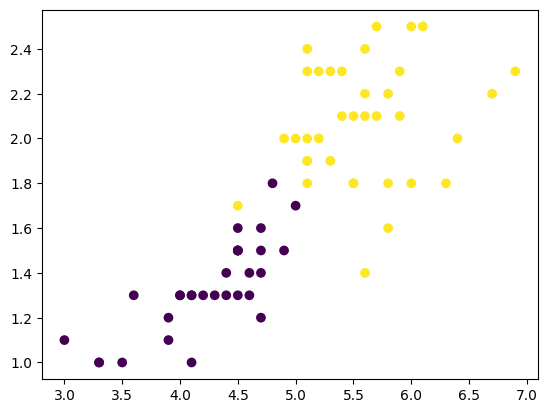

In [8]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size=0.33, random_state = 42 )

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train )
plt.show()

In [9]:
# Importando a árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Criando o classificador
modelo = DecisionTreeClassifier( random_state = 42 )

In [11]:
# Fazendo o fit com os dados de treino
modelo.fit( X_train, y_train );

In [12]:
# Verificando o score
modelo.score( X_train, y_train )

1.0

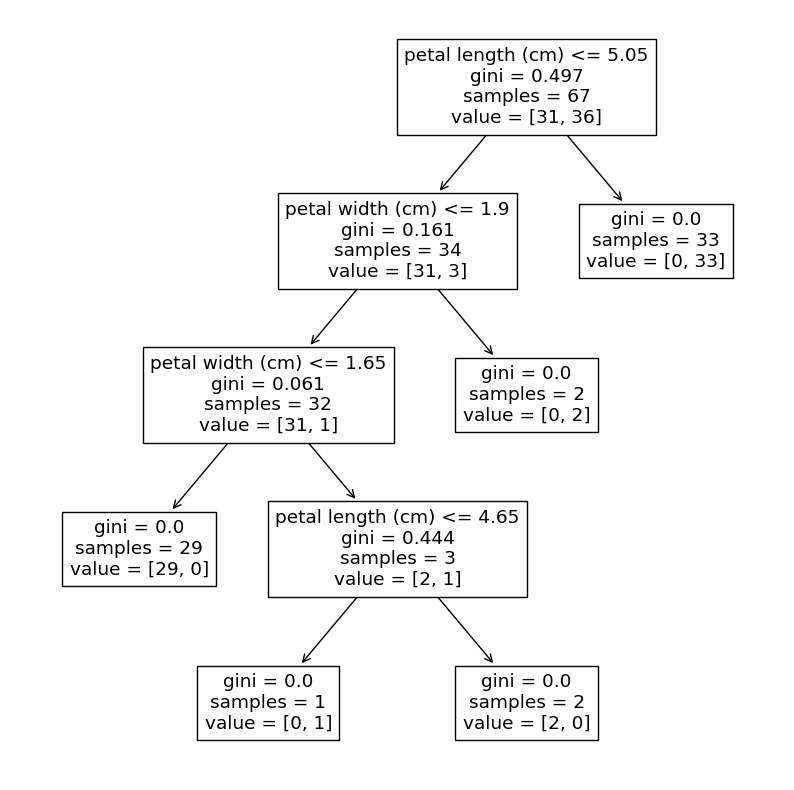

In [15]:
# Visualizando essa árvore
from sklearn.tree import plot_tree

plt.figure( figsize=(10,10))
plot_tree( modelo, feature_names=X_train.columns )
plt.show()

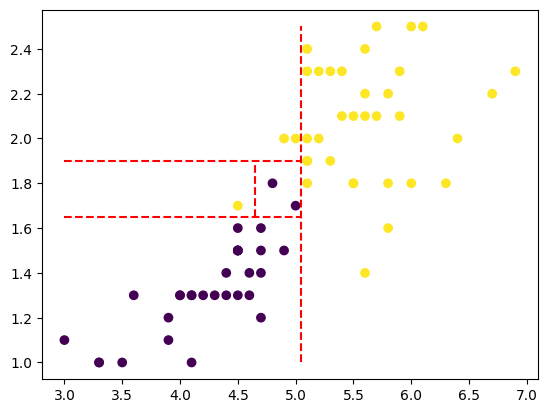

In [22]:
# Podemos adicionar essas regras no nosso gráfico
fig, ax = plt.subplots()

ax.scatter( X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train )

# petal length (cm) <= 5.05
ax.plot( [ 5.05, 5.05 ], [ 1, 2.5 ], '--r' )

# petal width (cm) <= 1.9
ax.plot( [ 3, 5.05 ], [ 1.9, 1.9 ], '--r')

# petal width (cm) <= 1.65
ax.plot( [ 3, 5.05 ], [ 1.65, 1.65 ], '--r')

# petal length (cm) <= 5.05
ax.plot( [4.65, 4.65 ], [ 1.65, 1.9 ], '--r' )

plt.show()

In [31]:
# Fazendo a previsão e avaliando o erro
y_pred = modelo.predict( X_teste )

from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, y_pred )

array([[19,  0],
       [ 0, 14]])

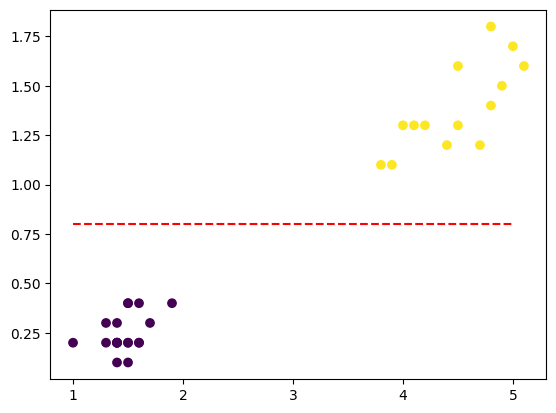

In [34]:
# Visualizando estes dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter( X_teste['petal length (cm)'], X_teste['petal width (cm)'], c=y_teste )

ax.plot( [ 1, 5 ], [ 0.8, 0.8 ], '--r' )

plt.show()


In [ ]:
# Separando X e y da base completa

In [ ]:
# Fazendo o train_test_split